In [1]:
import numpy as np
import numpy.ma as ma
import cv2
from matplotlib import pyplot as plt

from skimage import filters

In [2]:
raw_data_dir = "raw_data/"

In [19]:
def show_color_im(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
def save_color_im(img2):
    plt.imsave("masked_data/8p70_04.png", cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

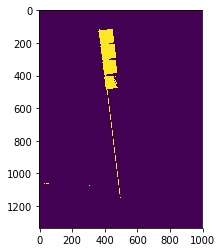

In [25]:
img = cv2.imread(raw_data_dir + '8p70_04.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh_val = np.median(gray)/1.2
ret, thresh = cv2.threshold(gray,thresh_val,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)
plt.show()

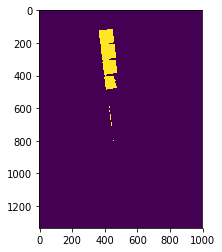

In [26]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 2)
plt.imshow(closing)
plt.show()

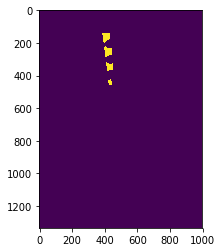

In [27]:
dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)
plt.imshow(sure_fg)
plt.show()

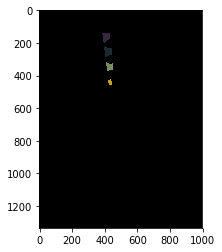

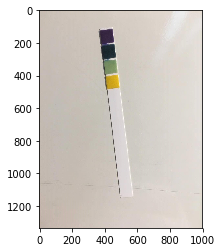

In [28]:
mask = cv2.cvtColor(sure_fg,cv2.COLOR_GRAY2RGB)
img_masked = img.copy()
img_masked[mask==0] = 0
plt.imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
# show_color_im(img_masked)
save_color_im(img_masked)
plt.show()
show_color_im(img)
plt.show()

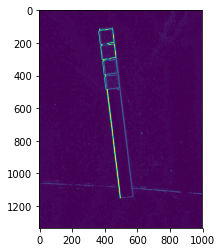

In [29]:
sobel = filters.sobel(gray)
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)
plt.show()

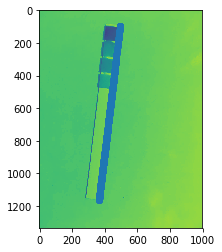

In [42]:
import numpy as np
light_spots = np.array((gray > 230).nonzero()).T
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(gray)
plt.show()

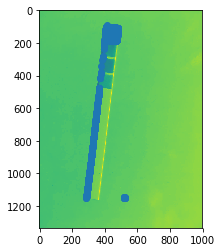

In [43]:
dark_spots = np.array((gray < 95).nonzero()).T
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(gray)
plt.show()

In [44]:
from scipy import ndimage as ndi
bool_mask = np.zeros(gray.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

99

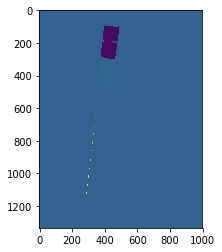

In [45]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)
plt.show()

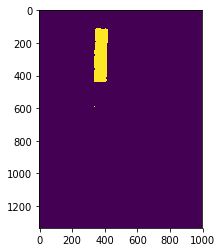

In [32]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background_mask = (ws == background)
plt.imshow(~background_mask)
plt.show()